In [1]:
import CactusTool
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/liuyu/simulations/BH/'
sim = CactusTool.load(path)

In [2]:
dset = sim.ASCII.x['H'].dataset

In [3]:
dset = dset[dset.time == 0]
dset = dset[dset.rl == 1]
# dset = dset[dset.c == 5]
dset

,it,tl,rl,c,ml,ix,iy,iz,time,x,y,z,H
116,0.0,0.0,1.0,2.0,0.0,1152.0,5888.0,768.0,0.0,-185.0,0.0,0.0,-9.470388e-10
117,0.0,0.0,1.0,2.0,0.0,1280.0,5888.0,768.0,0.0,-180.0,0.0,0.0,-9.484779e-10
118,0.0,0.0,1.0,2.0,0.0,1408.0,5888.0,768.0,0.0,-175.0,0.0,0.0,-9.227513e-10
119,0.0,0.0,1.0,2.0,0.0,1536.0,5888.0,768.0,0.0,-170.0,0.0,0.0,-8.599406e-10
120,0.0,0.0,1.0,2.0,0.0,1664.0,5888.0,768.0,0.0,-165.0,0.0,0.0,-7.506501e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.0,0.0,1.0,17.0,0.0,10112.0,5888.0,768.0,0.0,165.0,0.0,0.0,5.222360e-11
205,0.0,0.0,1.0,17.0,0.0,10240.0,5888.0,768.0,0.0,170.0,0.0,0.0,4.553519e-11
206,0.0,0.0,1.0,17.0,0.0,10368.0,5888.0,768.0,0.0,175.0,0.0,0.0,3.991600e-11
207,0.0,0.0,1.0,17.0,0.0,10496.0,5888.0,768.0,0.0,180.0,0.0,0.0,3.491569e-11


In [4]:
from scipy.interpolate import griddata
x = np.linspace(-10, 10, 1000)
f = griddata(dset.x, dset.M2, x, method='nearest')

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, f, '-')

AttributeError: 'DataFrame' object has no attribute 'M2'

In [ ]:
a = sorted([1., 2.])
print(a)

In [ ]:
import numpy as np
X, Y = np.mgrid[0:10:101j, 0:10:101j]
positions = np.vstack([X.ravel(), Y.ravel()])
print(positions)

In [ ]:
!ls /Users/liuyu/Downloads/

In [ ]:
import h5py

def GWdata(file):
    p = {}
    with h5py.File(file, 'r') as f:
        timeseries = f['strain']
        for item in list(f):
            print(item)
    return timeseries

In [ ]:
path = '/Users/liuyu/Downloads/'
file = path + 'H-H1_LOSC_4_V2-1126259446-32.hdf5'
ts = GWdata(file)
print(ts)

In [ ]:
path = '/Users/liuyu/Downloads/'
file = path + 'H-H1_LOSC_4_V2-1126259446-32.hdf5'
with h5py.File(file, 'r') as f:
    dset = f['strain'][0]
    print(dset)
#     print(np.array(dset))
#     print(f['strain'])
#     dset = f['strain']
#     print(np.array(dset))
#     for item in list(dset.attrs):
#         print(item)

In [9]:
from gwpy.timeseries import TimeSeries
path = '/Users/liuyu/Downloads/'
file = path + 'H-H1_LOSC_4_V2-1126259446-32.hdf5'
data = TimeSeries.read(file, format='hdf5.losc')
print(data)

TimeSeries([2.17704028e-19, 2.08763900e-19, 2.39681183e-19, ...,
            3.55365541e-20, 6.33533516e-20, 7.58121195e-20]
           unit: dimensionless,
           t0: 1126259446.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


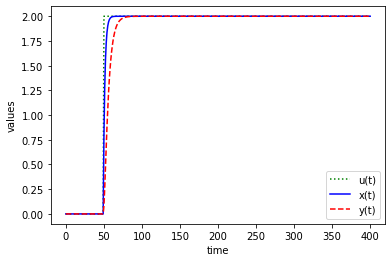

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u, v):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 400

# time points
t = np.linspace(0,400,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[50:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],0))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

PDE -> ODE -> odeint/solve_ivp/ode

In [9]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [12]:
n = 400
t = np.linspace(0,40,n)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

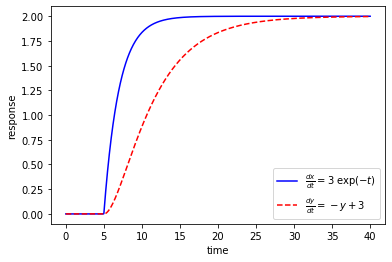

In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    if t<5:
        u=0
    else:
        u=2
    dxdt = .5 *(-z[0]+u)
    dydt = .2*(-z[1]+z[0])
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,40,1000)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()